# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
now = datetime.datetime.now()

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"We have found {len(cities)} cities to analyze")

We have found 602 cities to analyze


## Perform API Calls

In [3]:
#Creating base URL and empty dataframe
url = f"https://api.openweathermap.org/data/2.5/weather?APPID={api_key}&units=imperial&q="
weather_df = pd.DataFrame({"City":[],
                        "Country":[],
                        "Cloudiness":[],
                        "Date":[],
                        "Humidity":[],
                        "Lat":[],
                        "Lng":[],
                        "Max_temp":[],
                        "Wind_speed":[]
                       })
        

In [4]:
#API request for each city and populating dataframe in the same loop
i = 0
for city in cities:    
    response_req = requests.get(url+city)
    response = response_req.json()

    if (response["cod"] == 200):
        i = i+1
        print(f"Processing Record {i} | {city}")
        print(response_req.url)

        weather_df.loc[i,"City"] = city
        weather_df.loc[i,"Country"] = response["sys"]["country"]
        weather_df.loc[i,"Cloudiness"] = response["clouds"]["all"]
        weather_df.loc[i,"Date"] = now.strftime("%Y-%m-%d") 
        weather_df.loc[i,"Humidity"] = response["main"]["humidity"]
        weather_df.loc[i,"Lat"] = response["coord"]["lat"]
        weather_df.loc[i,"Lng"] = response["coord"]["lon"]
        weather_df.loc[i,"Max_temp"] = response["main"]["temp_max"]
        weather_df.loc[i,"Wind_speed"] = response["wind"]["speed"]
    else:
        print("City not found. Skipping")
            
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Processing Record 1 | kavieng
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=kavieng
Processing Record 2 | dingle
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=dingle
City not found. Skipping
Processing Record 3 | rikitea
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=rikitea
City not found. Skipping
City not found. Skipping
Processing Record 4 | ushuaia
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=ushuaia
Processing Record 5 | puerto escondido
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=puerto%20escondido
Processing Record 6 | alofi
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=alofi
Processing Record 7 | rodrigues alves
https://api.openweath

Processing Record 57 | butaritari
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=butaritari
Processing Record 58 | port augusta
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=port%20augusta
Processing Record 59 | hay river
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=hay%20river
Processing Record 60 | nikolskoye
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=nikolskoye
Processing Record 61 | wanaka
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=wanaka
City not found. Skipping
Processing Record 62 | rach gia
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=rach%20gia
Processing Record 63 | rocha
https://api.openweathermap.org/data/2.5/weather?APPID=5d

Processing Record 112 | syke
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=syke
Processing Record 113 | road town
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=road%20town
Processing Record 114 | laguna
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=laguna
City not found. Skipping
Processing Record 115 | mount gambier
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=mount%20gambier
City not found. Skipping
Processing Record 116 | williams lake
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=williams%20lake
Processing Record 117 | samarai
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=samarai
Processing Record 118 | ahuimanu
https://api.openweathermap.

Processing Record 166 | biak
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=biak
Processing Record 167 | kaitangata
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=kaitangata
Processing Record 168 | hokitika
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=hokitika
Processing Record 169 | hamilton
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=hamilton
Processing Record 170 | chiredzi
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=chiredzi
Processing Record 171 | kushima
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=kushima
Processing Record 172 | coolum beach
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=

Processing Record 221 | porto nacional
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=porto%20nacional
Processing Record 222 | carballo
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=carballo
Processing Record 223 | matara
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=matara
Processing Record 224 | keetmanshoop
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=keetmanshoop
Processing Record 225 | meulaboh
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=meulaboh
Processing Record 226 | sorland
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=sorland
Processing Record 227 | kralendijk
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c7856

City not found. Skipping
Processing Record 276 | emerald
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=emerald
Processing Record 277 | dunedin
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=dunedin
Processing Record 278 | rongcheng
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=rongcheng
Processing Record 279 | mehamn
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=mehamn
Processing Record 280 | asadabad
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=asadabad
Processing Record 281 | nizhnevartovsk
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=nizhnevartovsk
Processing Record 282 | zhenlai
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cef

Processing Record 332 | honiara
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=honiara
Processing Record 333 | lorengau
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=lorengau
Processing Record 334 | san jose el alto
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=san%20jose%20el%20alto
Processing Record 335 | malpe
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=malpe
Processing Record 336 | hasaki
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=hasaki
Processing Record 337 | klaksvik
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=klaksvik
Processing Record 338 | golovino
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3

Processing Record 388 | valente
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=valente
Processing Record 389 | conceicao do araguaia
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=conceicao%20do%20araguaia
City not found. Skipping
Processing Record 390 | piterka
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=piterka
City not found. Skipping
Processing Record 391 | kupang
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=kupang
Processing Record 392 | taoudenni
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=taoudenni
Processing Record 393 | kankan
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=kankan
Processing Record 394 | dehloran
https://api.openweath

Processing Record 443 | dzerzhinskoye
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=dzerzhinskoye
Processing Record 444 | savinka
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=savinka
Processing Record 445 | lunino
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=lunino
City not found. Skipping
Processing Record 446 | shenjiamen
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=shenjiamen
City not found. Skipping
Processing Record 447 | bunesti
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=bunesti
Processing Record 448 | makakilo city
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=makakilo%20city
Processing Record 449 | manhattan
https://api.openweathe

Processing Record 498 | yuli
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=yuli
Processing Record 499 | young
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=young
Processing Record 500 | andra
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=andra
Processing Record 501 | half moon bay
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=half%20moon%20bay
Processing Record 502 | kiruna
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=kiruna
Processing Record 503 | cuamba
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=cuamba
Processing Record 504 | san juan
https://api.openweathermap.org/data/2.5/weather?APPID=5d93cefcb3fdd4c78563b1a02a3b1057&units=imperial&q=s

In [5]:
weather_df.to_csv("weather_data.csv")
weather_df.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max_temp,Wind_speed
1,kavieng,PG,64.0,2018-11-26,100.0,-2.57,150.80,84.66,10.22
2,dingle,PH,0.0,2018-11-26,71.0,11.00,122.67,80.39,12.80
3,rikitea,PF,48.0,2018-11-26,99.0,-23.12,-134.97,78.05,9.10
4,ushuaia,AR,20.0,2018-11-26,61.0,-54.81,-68.31,50.00,28.86
5,puerto escondido,MX,40.0,2018-11-26,70.0,15.86,-97.07,84.20,3.36


## Latitude vs Temperature Plot

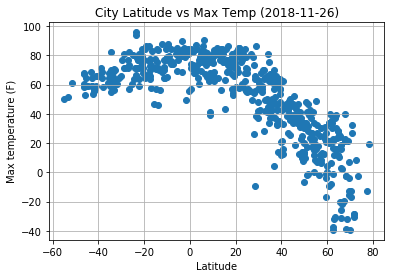

In [6]:
# Build scatter plot for latitude vs temperature
plt.figure()
plt.scatter(weather_df["Lat"],weather_df["Max_temp"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max temperature (F)")
plt.title(f"City Latitude vs Max Temp ({weather_df.iloc[0]['Date']})")

# Save the figure
plt.savefig("Lat&Temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

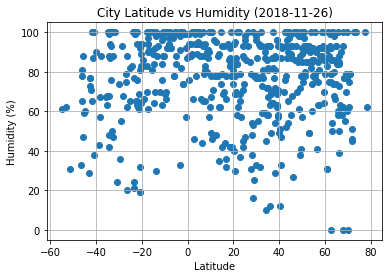

In [7]:
# Build the scatter plots for each city types
plt.figure()
plt.scatter(weather_df["Lat"],weather_df["Humidity"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({weather_df.iloc[0]['Date']})")

# Save the figure
plt.savefig("Lat&Hum.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

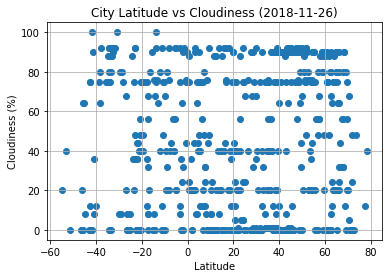

In [8]:
# Build the scatter plots for each city types
plt.figure()
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({weather_df.iloc[0]['Date']})")

# Save the figure
plt.savefig("Lat&Cloud.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

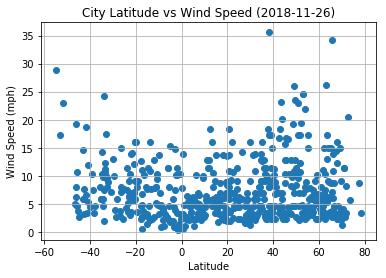

In [9]:
# Build the scatter plots for each city types
plt.figure()
plt.scatter(weather_df["Lat"],weather_df["Wind_speed"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({weather_df.iloc[0]['Date']})")

# Save the figure
plt.savefig("Lat&Wind.png")

# Show plot
plt.show()